In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [13]:
from sklearn.datasets import fetch_20newsgroups 

In [19]:
dataset=fetch_20newsgroups(shuffle=True,random_state=1,remove=('headers','footers','quotes'))
documents=dataset.data


In [20]:
documents[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [21]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [28]:
#Data preprocessing
new_df=pd.DataFrame({'document':documents})#header
#remove everything except alphabet
new_df['clean_doc']=new_df['document'].str.replace('["a-zA-Z#"]'," ")
#removing short words
new_df['clean_doc']=new_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#make all lowercase
new_df['clean_doc']=new_df['clean_doc'].apply(lambda x:x.lower())

In [29]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
#tokenize
tokens=new_df['clean_doc'].apply(lambda x:x.split())
#remove stop words
tokens=tokens.apply(lambda x:[item for item in x if item not in stop_words])

In [30]:
#de-tokenization
detoken=[]
for i in range(len(new_df)):
    t=' '.join(tokens[i])
    detoken.append(t)

new_df['clean_doc']=detoken

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)

In [33]:
X=vectorizer.fit_transform(new_df['clean_doc'])
X.shape

(11314, 1000)

In [34]:
#Topic modelling
from sklearn.decomposition import TruncatedSVD

#SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20,algorithm='randomized',n_iter=100,random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [40]:
term=vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp=zip(term,comp)
    sorted_terms=sorted(terms_comp,key=lambda x:x[1],reverse=True)[:7]
    print("Topic"+str(i)+":")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic0:
1993
 
10
 
00
 
000
 
100
 
20
 
15
 
Topic1:
1993
 
1992
 
1991
 
6394
 
301
 
02
 
93
 
Topic2:
100
 
1993
 
000
 
1992
 
300
 
200
 
500
 
Topic3:
00
 
100
 
1993
 
50
 
30
 
01
 
250
 
Topic4:
000
 
00
 
50
 
500
 
200
 
1000
 
1993
 
Topic5:
10
 
1993
 
00
 
000
 
100
 
6394
 
______________________________________________________________
 
Topic6:
1992
 
10
 
00
 
1991
 
1989
 
1990
 
93
 
Topic7:
20
 
30
 
1992
 
25
 
10
 
1991
 
100
 
Topic8:
1000
 
50
 
25
 
500
 
1024
 
30
 
300
 
Topic9:
1000
 
500
 
20
 
1024
 
300
 
800
 
15
 
Topic10:
25
 
386
 
500
 
00
 
10
 
000
 
400
 
Topic11:
1024
 
500
 
30
 
200
 
1280
 
300
 
768
 
Topic12:
500
 
50
 
20
 
2000
 
16
 
1988
 
19
 
Topic13:
1024
 
20
 
1000
 
1280
 
14
 
50
 
768
 
Topic14:
14
 
30
 
500
 
300
 
20
 
400
 
200
 
Topic15:
200
 
300
 
800
 
400
 
20
 
15
 
150
 
Topic16:
12
 
300
 
1024
 
14
 
20
 
50
 
400
 
Topic17:
386
 
486
 
16
 
200
 
12
 
33
 
1992
 
Topic18:
15
 
200
 
25
 
500
 
1000
 
14
 
12
 
Top

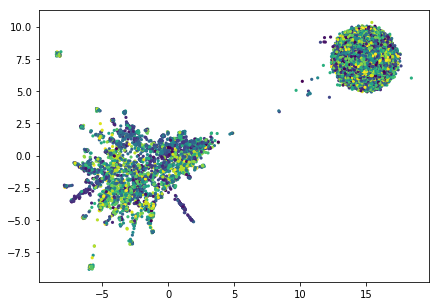

In [46]:
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))

plt.scatter(embedding[:, 0], embedding[:, 1], c = dataset.target,s = 10,edgecolor='none')
plt.show()